# Brief Insight about Medicare :

Medicare is the federal government plan in the U.S. for paying certain hospital and medical expenses for elderly persons qualifying under the plan

It is available for people age 65 or older, younger people with disabilities and people with End Stage Renal Disease (permanent kidney failure requiring dialysis or transplant). Medicare has two parts, Part A (Hospital Insurance) and Part B (Medicare Insurance). You are eligible for premium-free Part A if you are age 65 or older and you or your spouse worked and paid Medicare taxes for at least 10 years.

Medicare Part A (Hospital Insurance): Part A covers inpatient hospital stays, care in a skilled nursing facility, hospice care, and some home health care.

Medicare Part B (Medical Insurance): Part B covers certain doctors' services, outpatient care, medical supplies, and preventive services

Medicare Part D (prescription drug coverage): Helps cover the cost of prescription drugs (including many recommended shots or vaccines).

# Aim: To Predict Average Medicare Payment Amount Avg_Mdcr_Pymt_Amt

Average of the Medicare allowed amount for the service. Medicare allowed amounts includes the amount Medicare pays, the deductible and coinsurance amounts that the beneficiary is responsible for paying, and any amounts that a third party is responsible for paying

# Import Libraries

In [1]:
import pandas as pd

# Pandas:- It is Dataframe Based operation library for Read,Write,Reshape,Concat,Resample and some Data Funations..etc. 
#          Default in Dataframe Row are Observations And Columns are Variables in Table Like Excel.

import numpy as np

# Numapy :- Array/List Based operation for all compitation and Calculations perford from this Library Some Sub libararies in 
#           Numpay 1).Scipy.stats for statistics 2).Statsmodel for timeseries 3).Skleran for Machine learning.

import matplotlib.pyplot as plt

# Matplotlib.pyplot:- Viaulaziation library for Creating Charts and most insights window plots ,Create Lables,Titles...etc

import seaborn as sns

# Seaborn :- Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for 
#            creating informative and aesthetically pleasing statistical graphics.

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Warnings are ignored when ex

import nltk # (NLP)--Natural Language Toolkit

# NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use 
# interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries 
# for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength 
# NLP libraries, and an active discussion forum.


import re # (RE)--- Regular Expression

# the functions in this module let you check if a particular string matches a given regular expression (or if a given 
# regular expression matches a particular string, which comes down to the same thing).

# Finding Data Path

In [2]:
import io

# Io:- Input/Output library for setting up working directory.

%cd "D:\projects\medicare"

C:\Users\sujit\Downloads\PGA 26 datasets\Medicare


# Read Data

In [3]:
medicare=pd.read_csv("MUP_PHY_R22_P05_V10_D20_Geo.csv",low_memory=False)

# About Data

In [4]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268149 entries, 0 to 268148
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   268149 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    255046 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  268134 non-null  object 
 3   HCPCS_Cd               268149 non-null  object 
 4   HCPCS_Desc             268149 non-null  object 
 5   HCPCS_Drug_Ind         268149 non-null  object 
 6   Place_Of_Srvc          268149 non-null  object 
 7   Tot_Rndrng_Prvdrs      268149 non-null  int64  
 8   Tot_Benes              268149 non-null  int64  
 9   Tot_Srvcs              268149 non-null  float64
 10  Tot_Bene_Day_Srvcs     268149 non-null  int64  
 11  Avg_Sbmtd_Chrg         268149 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     268149 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      268149 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     268149 non-nu

# Print Strating 5 Rows

In [5]:
medicare.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,10,86,86.0,86,32.988140,17.498140,17.498140,16.817674
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,1809,159365,159385.0,159385,31.256701,16.787724,16.787724,16.624377
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,53,279,279.0,279,66.476595,28.183763,28.183763,27.927168
3,National,NaN,National,0003M,Liver dis 10 assays w/nash,N,O,14,88,88.0,88,572.583864,453.142955,451.136136,485.021591
4,National,NaN,National,0005U,Test for detecting genes associated with prost...,N,O,1,4886,4939.0,4939,795.000000,755.012104,755.012104,744.999231


## Data Preprocessing

## Finding Missing Values

In [6]:
pd.set_option('display.max_rows',62)
medicare.Rndrng_Prvdr_Geo_Cd.value_counts(dropna=False)

NaN    13103
06      8843
12      8353
48      8079
36      7663
42      7132
39      6702
17      6694
37      6587
34      6286
26      6239
13      6135
25      6095
51      6075
04      6006
47      5952
24      5866
53      5766
18      5656
29      5649
27      5509
08      5380
01      5253
55      5235
45      5194
40      5028
22      4975
20      4831
21      4805
41      4616
09      4472
28      4388
05      4382
19      4369
32      4252
49      4183
31      4007
35      3577
54      3479
16      3294
33      3282
23      3219
46      3185
10      3110
30      2996
44      2897
38      2843
11      2835
15      2829
02      2239
56      2183
72      2034
50      2027
66       660
78       639
9E       295
9D       207
9B       183
9A       160
9C       122
69        89
60         5
Name: Rndrng_Prvdr_Geo_Cd, dtype: int64

In [7]:
medicare.Rndrng_Prvdr_Geo_Desc.value_counts(dropna=False)

National                              13088
California                             8843
Florida                                8353
Texas                                  8079
New York                               7663
                                      ...  
Armed Forces Central/South America      160
Armed Forces Pacific                    122
Northern Mariana Islands                 89
NaN                                      15
American Samoa                            5
Name: Rndrng_Prvdr_Geo_Desc, Length: 63, dtype: int64

In [8]:
medicare.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      13103
Rndrng_Prvdr_Geo_Desc       15
Rndrng_Prvdr_Geo_Lvl         0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

# Imputation

In [9]:
medicare.Rndrng_Prvdr_Geo_Cd=medicare.Rndrng_Prvdr_Geo_Cd.fillna("Missing")

# More then 70% missing values impute with missing word

In [10]:
medicare.Rndrng_Prvdr_Geo_Desc=medicare.Rndrng_Prvdr_Geo_Desc.fillna(
    medicare.Rndrng_Prvdr_Geo_Desc.value_counts().idxmax())

# Less then 70% missing Values impute with idxmax(Mode)

# Hypothesis Testing:

# Inferential Statistics:

#### Statical interface method of validate particuar hypothise using given data

# Group by

Two Sample Independent Ttest

In [11]:
from scipy.stats import ttest_ind # Only 2classes/levels

1.Test Null : There is Significant difference in the average of Avg_Mdcr_Pymt_Amt and Rndrng_Prvdr_Geo_Lvl

In [12]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    238.029301
Y    165.110441
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [13]:
# split classes

y=medicare[medicare.HCPCS_Drug_Ind=='Y']
n=medicare[medicare.HCPCS_Drug_Ind=='N']

In [14]:
ttest_ind(y.Avg_Mdcr_Pymt_Amt,n.Avg_Mdcr_Pymt_Amt,equal_var=False)

# since pvalue=2.352591533843008e-05 is less than 0.05,Reject Null

Ttest_indResult(statistic=-4.230111646001085, pvalue=2.352591533843008e-05)

2.Test Null : There is Significant difference in the average of Avg_Mdcr_Pymt_Amt and Rndrng_Prvdr_Geo_Lvl

In [15]:
medicare.Rndrng_Prvdr_Geo_Lvl.value_counts()

State       255061
National     13088
Name: Rndrng_Prvdr_Geo_Lvl, dtype: int64

In [16]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    324.770801
State       230.066754
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [17]:
# Split classes

state=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='State']
national=medicare[medicare.Rndrng_Prvdr_Geo_Lvl=='National']

In [18]:
ttest_ind(state.Avg_Mdcr_Pymt_Amt,national.Avg_Mdcr_Pymt_Amt,equal_var=False)

# since pvalue=8.775249194770759e-62 is less than 0.05,Reject Null

Ttest_indResult(statistic=-16.66613497725422, pvalue=8.775249194770759e-62)

3.Test Null : There is Significant difference in the average of Avg_Mdcr_Pymt_Amt and Place_Of_Sercs

In [19]:
medicare.Avg_Mdcr_Pymt_Amt.groupby(medicare.Place_Of_Srvc).mean()

Place_Of_Srvc
F    294.058659
O    166.146023
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [20]:
# Split Classes

f=medicare[medicare.Place_Of_Srvc=='F']
o=medicare[medicare.Place_Of_Srvc=='O']

In [21]:
ttest_ind(f.Avg_Mdcr_Pymt_Amt,o.Avg_Mdcr_Pymt_Amt,equal_var=False)

# since pvalue=0.0 is less than 0.05,Reject Null

Ttest_indResult(statistic=51.76681036972862, pvalue=0.0)

# Chi-Square Test of Independence:

In [22]:
from scipy.stats import chi2_contingency # Test between Two Catgorical variables

1.Test Null No Association between HCPCS_Drug_Ind & Place_Of_Srvc

In [23]:
pd.crosstab(medicare.HCPCS_Drug_Ind,medicare.Place_Of_Srvc)

Place_Of_Srvc,F,O
HCPCS_Drug_Ind,,
N,143316,112550
Y,374,11909


In [24]:
chi2_contingency(pd.crosstab(medicare.HCPCS_Drug_Ind,medicare.Place_Of_Srvc))

# Since pvalue=0.0 is less then 0.05, Reject Null

Chi2ContingencyResult(statistic=13218.60491351658, pvalue=0.0, dof=1, expected_freq=array([[137108.04642195, 118757.95357805],
       [  6581.95357805,   5701.04642195]]))

2.Test Null No Association between HCPCS_Drug_Ind & Rndrng_Prvdr_Geo_Lvl

In [25]:
pd.crosstab(medicare.HCPCS_Drug_Ind,medicare.Rndrng_Prvdr_Geo_Lvl)

Rndrng_Prvdr_Geo_Lvl,National,State
HCPCS_Drug_Ind,,
N,12511,243355
Y,577,11706


In [26]:
chi2_contingency(pd.crosstab(medicare.HCPCS_Drug_Ind,medicare.Rndrng_Prvdr_Geo_Lvl))

# Since pvalue=0.34524217865002880 is grater then 0.05, Fail to Reject Null

Chi2ContingencyResult(statistic=0.8908680659992385, pvalue=0.3452421786500288, dof=1, expected_freq=array([[ 12488.48292554, 243377.51707446],
       [   599.51707446,  11683.48292554]]))

2.Test Null No Association between Place_Of_Srvc & Rndrng_Prvdr_Geo_Lvl

In [27]:
pd.crosstab(medicare.Place_Of_Srvc,medicare.Rndrng_Prvdr_Geo_Lvl)

Rndrng_Prvdr_Geo_Lvl,National,State
Place_Of_Srvc,,
F,7008,136682
O,6080,118379


In [28]:
chi2_contingency(pd.crosstab(medicare.Place_Of_Srvc,medicare.Rndrng_Prvdr_Geo_Lvl))

# Since pvalue=0.9309736091340755 is grater then 0.05, Fail to Reject Null

Chi2ContingencyResult(statistic=0.007503015424361353, pvalue=0.9309736091340755, dof=1, expected_freq=array([[  7013.31990796, 136676.68009204],
       [  6074.68009204, 118384.31990796]]))

# Data Transformation / Spliting Catgorical and numaric Columns

In [29]:
numcols=medicare.select_dtypes(include=np.number)
objcols=medicare.select_dtypes(include=['object'])

In [30]:
numcols.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,10,86,86.0,86,32.988140,17.498140,17.498140,16.817674
1,1809,159365,159385.0,159385,31.256701,16.787724,16.787724,16.624377
2,53,279,279.0,279,66.476595,28.183763,28.183763,27.927168
3,14,88,88.0,88,572.583864,453.142955,451.136136,485.021591
4,1,4886,4939.0,4939,795.000000,755.012104,755.012104,744.999231


# Checking Multicolinarty

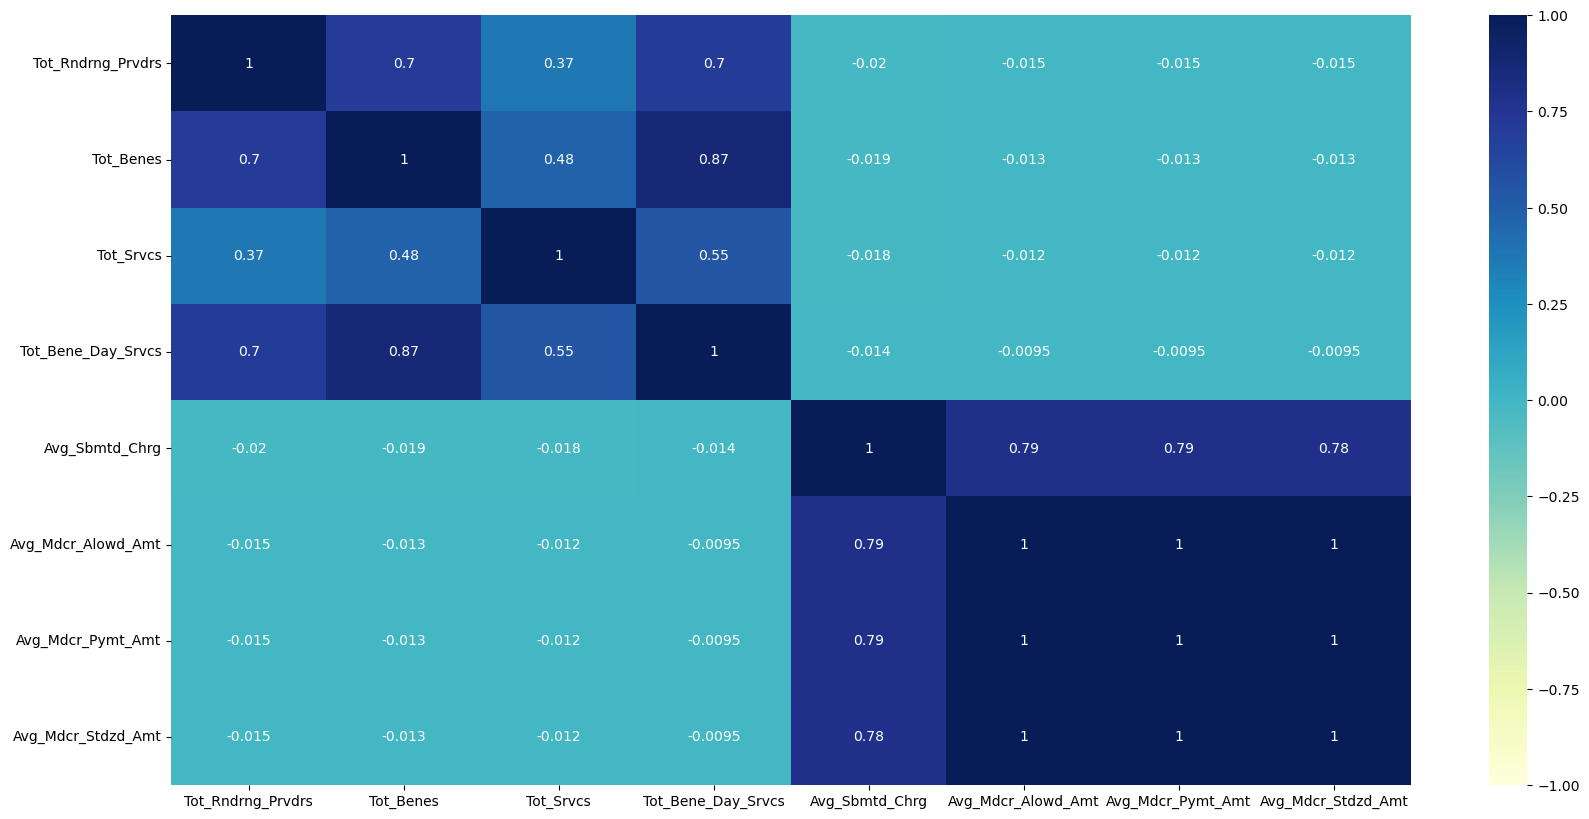

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(numcols.corr(),annot=True,cmap="YlGnBu",vmax=1,vmin=-1);

# Some Variables have multicolinarty drop the variables based on there importence

In [32]:
numcols.describe()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
count,268149.000000,2.681490e+05,2.681490e+05,2.681490e+05,268149.000000,268149.000000,268149.000000,268149.000000
mean,265.080384,5.102847e+03,2.217960e+04,9.813789e+03,1252.792807,294.650498,234.689134,231.083286
std,3217.362460,1.093134e+05,5.981873e+05,2.935606e+05,2377.146038,769.097482,615.856306,609.502225
min,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,0.001320,0.001320,0.001320,0.001320
25%,12.000000,3.000000e+01,4.000000e+01,3.800000e+01,125.931769,36.354151,28.722222,28.524009
50%,29.000000,1.040000e+02,1.570000e+02,1.400000e+02,429.062275,114.713750,88.848148,87.745486
75%,95.000000,5.650000e+02,1.027000e+03,8.010000e+02,1551.450000,324.139231,257.895263,255.125000
max,581706.000000,2.179407e+07,1.221294e+08,8.171052e+07,92910.466667,50821.879118,40603.953941,40010.077882


# 'Skewness' and 'Kurtosis' - Metrics for understanding the Data distribution :

Skewness : It is the Measure of Assymetry of the Curve

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

# Kurtosis : The height of the Distribution Curve with respect to Normal Distribution

It tells us if the data is heavy or light tailed relative to a normal distribution.
Kurtosis range from -10 to +10.

<Axes: ylabel='Density'>

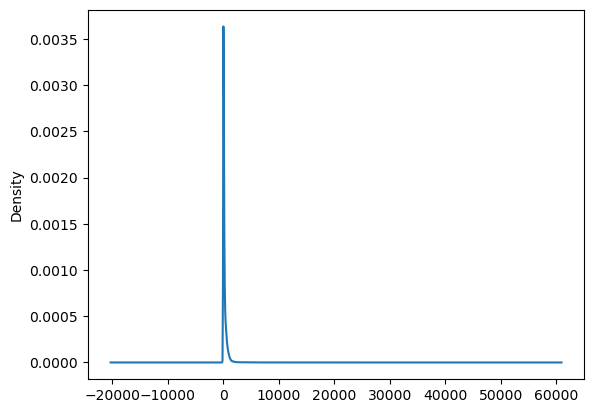

In [33]:
numcols.Avg_Mdcr_Pymt_Amt.plot(kind='density')

In [34]:
print('Skewness:',numcols.Avg_Mdcr_Pymt_Amt.skew())
print('Kurtosis:',numcols.Avg_Mdcr_Pymt_Amt.kurt())

Skewness: 30.230227910965553
Kurtosis: 1636.7613012812824


<Axes: ylabel='Density'>

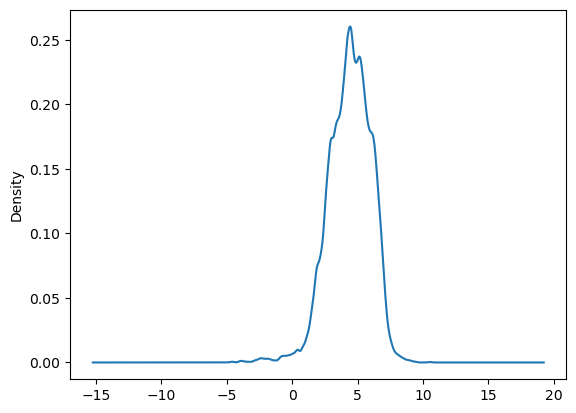

In [35]:
np.log(numcols.Avg_Mdcr_Pymt_Amt).plot(kind='density')

In [36]:
print('Skewness:',np.log(numcols.Avg_Mdcr_Pymt_Amt).skew())
print('Kurtosis:',np.log(numcols.Avg_Mdcr_Pymt_Amt).kurt())

Skewness: -0.6135549784940002
Kurtosis: 1.3767100728222368


In [37]:
numcols=numcols.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'],axis=1)

In [38]:
objcols.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc
0,National,Missing,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F
1,National,Missing,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O
2,National,Missing,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O
3,National,Missing,National,0003M,Liver dis 10 assays w/nash,N,O
4,National,Missing,National,0005U,Test for detecting genes associated with prost...,N,O


In [39]:
for i in objcols.columns:
    freq=objcols[i].value_counts()
    print(freq)

State       255061
National     13088
Name: Rndrng_Prvdr_Geo_Lvl, dtype: int64
Missing    13103
06          8843
12          8353
48          8079
36          7663
42          7132
39          6702
17          6694
37          6587
34          6286
26          6239
13          6135
25          6095
51          6075
04          6006
47          5952
24          5866
53          5766
18          5656
29          5649
27          5509
08          5380
01          5253
55          5235
45          5194
40          5028
22          4975
20          4831
21          4805
41          4616
09          4472
28          4388
05          4382
19          4369
32          4252
49          4183
31          4007
35          3577
54          3479
16          3294
33          3282
23          3219
46          3185
10          3110
30          2996
44          2897
38          2843
11          2835
15          2829
02          2239
56          2183
72          2034
50          2027
66           660
78 

In [40]:
objcols.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc'],
      dtype='object')

In [41]:
objcols.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc
0,National,Missing,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F
1,National,Missing,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O
2,National,Missing,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O
3,National,Missing,National,0003M,Liver dis 10 assays w/nash,N,O
4,National,Missing,National,0005U,Test for detecting genes associated with prost...,N,O


# LabelEncoding

#### it is used catgorical obejects assign in numaric identifier 0 to n lavels in alphabetic order

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
objcols.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc'],
      dtype='object')

#### Dummies: it is used catgorical obejects assign in numaric identifier binary (0 and 1) add anthoer variables based on classes.

In [45]:
objcols_dummy=pd.get_dummies(objcols.drop(['HCPCS_Cd', 'HCPCS_Desc','Rndrng_Prvdr_Geo_Cd'],axis=1))

In [46]:
objcols_dummy.shape

(268149, 68)

In [47]:
objcols.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc'],
      dtype='object')

In [48]:
objcols_en=objcols.drop(['HCPCS_Cd','Rndrng_Prvdr_Geo_Cd','HCPCS_Desc'],axis=1).apply(le.fit_transform)

In [49]:
objcols_en.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Desc,HCPCS_Drug_Ind,Place_Of_Srvc
0,0,33,0,0
1,0,33,0,1
2,0,33,0,1
3,0,33,0,1
4,0,33,0,1


In [50]:
numcols.columns

Index(['Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [51]:
from sklearn.preprocessing import RobustScaler

# Data has more outliers using roubustscaler

<Axes: >

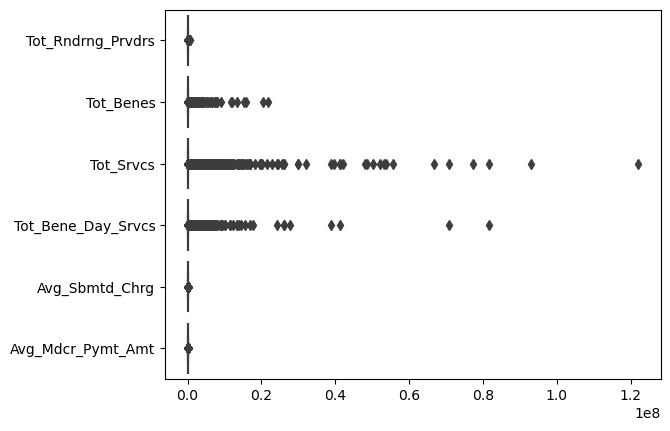

In [52]:
sns.boxplot(numcols,orient='h')

In [53]:
robust=RobustScaler()

In [54]:
numcols_robust=robust.fit_transform(numcols.drop('Avg_Mdcr_Pymt_Amt',axis=1))

In [55]:
numcols_robust=pd.DataFrame(numcols_robust,columns=['Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg'])

In [56]:
medicare.HCPCS_Desc.head()

0                         Adm sarscov2 30mcg/0.3ml 1st
1                         Adm sarscov2 30mcg/0.3ml 1st
2                         Adm sarscov2 30mcg/0.3ml 2nd
3                           Liver dis 10 assays w/nash
4    Test for detecting genes associated with prost...
Name: HCPCS_Desc, dtype: object

In [57]:
medicaretxt=medicare.HCPCS_Desc

# We Took text data

In [58]:
# Create funcation Replace special latters in cintent with space

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",tweet).split())

In [59]:
medicaretxt=[str(clean_tweet(w)) for w in medicaretxt]

# Text covert into words

In [60]:
medicaretxt=pd.DataFrame(medicaretxt,columns=['HPCS_Desc'])

In [61]:
medicaretxt.HPCS_Desc=medicaretxt.HPCS_Desc.str.lower()

# All words covert in lower case

In [62]:
from nltk.corpus import stopwords

# This used stop the english stop words like and,is,are,that...etc

In [63]:
stop_words=set(stopwords.words("english")) # define stopwords

In [64]:
medicare_words=medicaretxt.HPCS_Desc.str.split()

In [65]:
from wordcloud import WordCloud

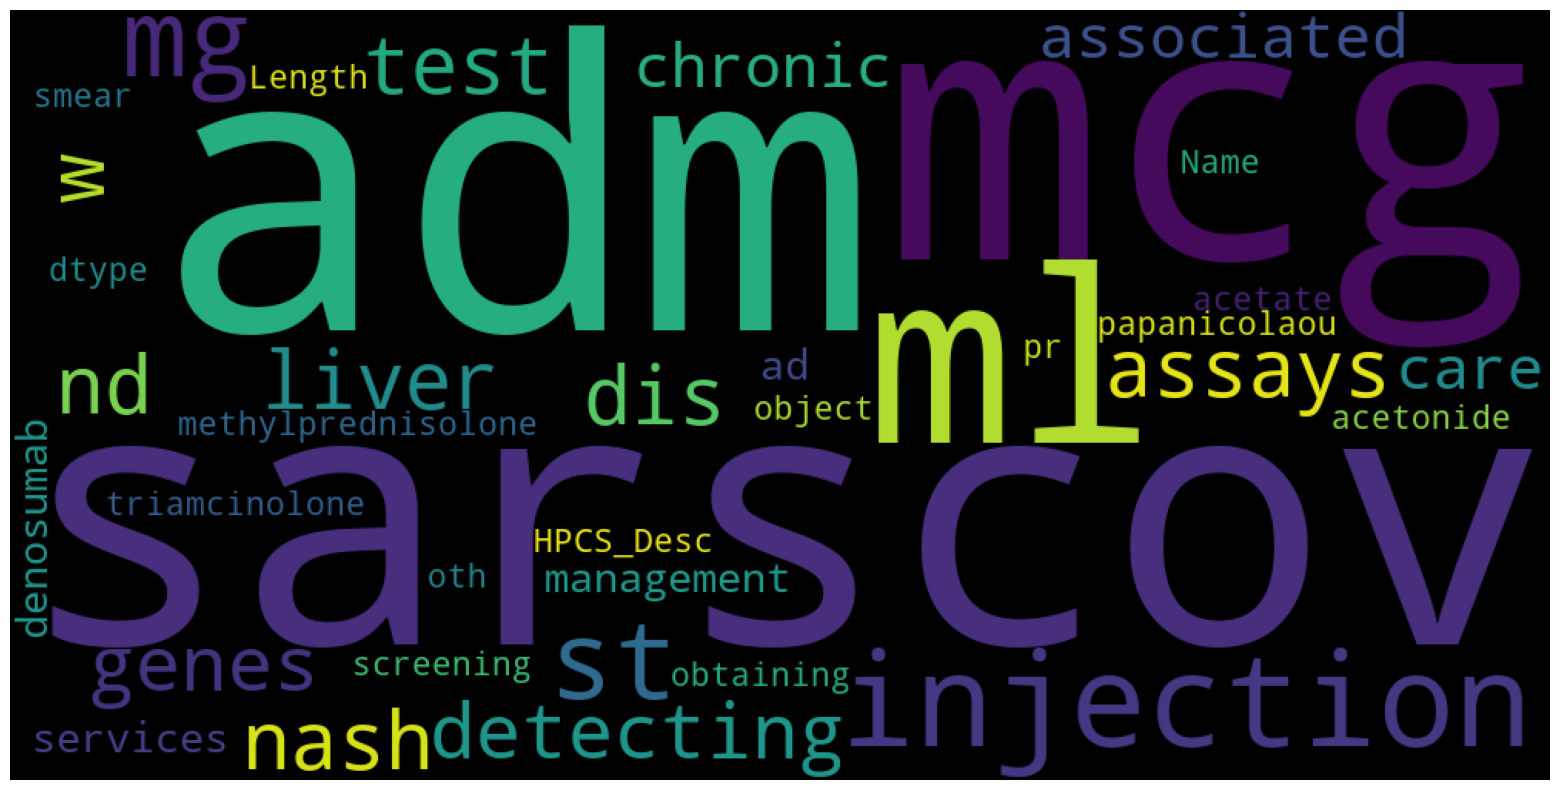

In [66]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stop_words).generate(str(medicare_words))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
medicare_words=medicare_words.map(' '.join) 

# Combine words in rows into single list or array of words

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
DTM=CountVectorizer(stop_words='english',max_features=300,ngram_range=(2,2))

In [70]:
nlp_DTM=DTM.fit_transform(medicare_words)

In [71]:
nlp_DTM.shape

(268149, 300)

In [72]:
pd.DataFrame(nlp_DTM.toarray(),columns=DTM.vocabulary_).head()

,anesthesia procedure,using endoscope,soft tissue,gene analysis,ray imaging,blood vessel,brain spinal,spinal cord,needle biopsy,blood vessels,...,visit typically,inpatient care,minutes day,facility visit,management services,care management,cancer screening,home health,minutes communicating,communicating patient
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
nlp_df=pd.DataFrame(nlp_DTM.toarray(),columns=DTM.vocabulary_)

In [74]:
numcols.columns

Index(['Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [75]:
medicare_df=pd.concat([nlp_df,objcols_dummy,numcols_robust],axis=1)

In [76]:
medicare_df1=pd.concat([nlp_df,objcols_en,numcols_robust],axis=1)

In [77]:
y=numcols.Avg_Mdcr_Pymt_Amt
X=medicare_df
X1=medicare_df1

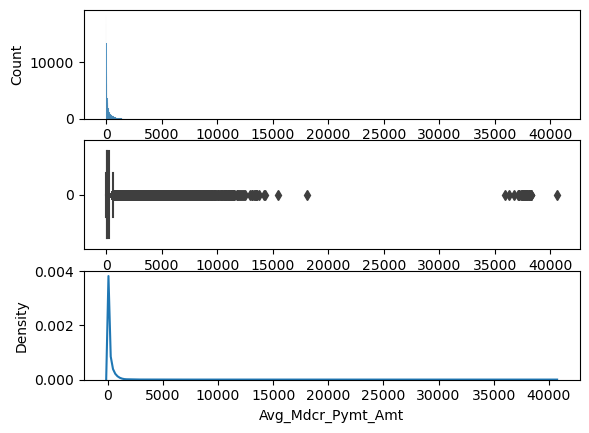

In [78]:
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.kdeplot(y,ax=ax[2]);

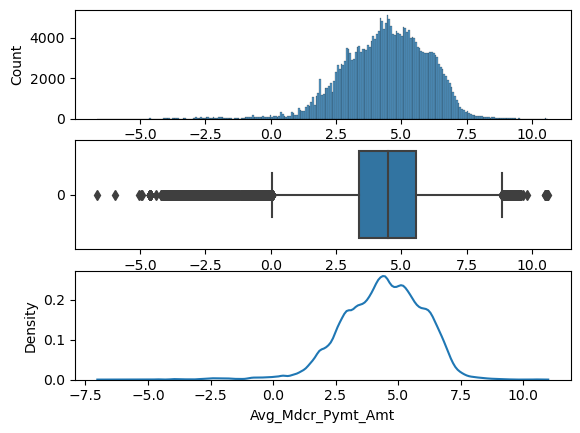

In [79]:
fig,ax=plt.subplots(3,1)
sns.histplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.kdeplot(np.log(y),ax=ax[2]);

This depenedent variable have numeric values now we build the "REGRESSION" Models

# Regression

#### In the dependent variable must be in numeric , continus.
#### In the numeric varibles are no missing values, closed to normal dirstbuation,minumum outlier
#### no multicolinarty between any two variables, if have multicolinarty the prblm have over fitting, mulicolinarty(>0.95) 

# With pd.get_dummmies()

# Linear Regression

 It is supervise learning algoritm we easily find which is dependent variable and which is independent variable.Mainly it is find linera relation between both independent and numaric dependent variables.

Without Logarithmic function

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg=LinearRegression()

In [82]:
regmodel=reg.fit(X,y)

In [83]:
regmodel.score(X,y)

0.655056542404949

In [84]:
regpred=regmodel.predict(X)

In [85]:
regresid=y-regpred

In [86]:
np.sqrt(np.mean(regresid**2))

361.703356426028

With Logarithmic function

In [87]:
regmodel=reg.fit(X,np.log(y))

In [88]:
regmodel.score(X,np.log(y))

0.5621432964213953

In [89]:
regpred=regmodel.predict(X)

In [90]:
regpred=np.exp(regpred)

In [91]:
regresid=y-regpred

In [92]:
np.sqrt(np.mean(regresid**2))

280777372307.10126

# Decision Tree

Single Tree Algoritham -Decision Tree is a Binary splitting and recursive  partitioning treedecision tree has a root node on top which splitss into decision nodes and further splits into leaf node/terminl node orfurther decision nodes.Recursive partitioning is tree splits on pervious node number of observations. Once all observation are classified into leafnodes or terminal nodes, Tree growth will stop.

without Logarithmic function

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [94]:
tree=DecisionTreeRegressor(max_depth=15)

In [95]:
treemodel=tree.fit(X,y)

In [96]:
treemodel.score(X,y)

0.9398602804254511

In [97]:
cross_val_score(tree,X,y)

array([0.82730998, 0.85289513, 0.79156527, 0.8761705 , 0.86216294])

In [98]:
np.mean([0.82730998, 0.85289513, 0.79156527, 0.8761705 , 0.86216294])

0.8420207639999999

In [99]:
treepred=treemodel.predict(X)

In [100]:
treeresid=y-treepred

In [101]:
np.sqrt(np.mean(treeresid**2))

151.02862970689964

with Logarithmic Function

In [102]:
tree=DecisionTreeRegressor(max_depth=40)

In [103]:
treemodel=tree.fit(X,np.log(y))

In [104]:
treemodel.score(X,np.log(y))

0.9740708550391172

In [105]:
cross_val_score(tree,X,np.log(y))

array([0.87520883, 0.89113844, 0.88760969, 0.885337  , 0.8535232 ])

In [106]:
np.mean([0.87520883, 0.89113844, 0.88760969, 0.885337  , 0.8535232 ])

0.878563432

In [107]:
treepred=treemodel.predict(X)

In [108]:
treepred=np.exp(treepred)

In [109]:
treeresid=y-treepred

In [110]:
np.sqrt(np.mean(treeresid**2))

87.52270625733816

# Random Forest

MultiTree Models - Ensemble Techniques - Bagging - Random Algorithm Bagging also called as Bootstrap Aggregating is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms.  It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model.  Bagging avoids overfitting of data and is used for both regression and classification models,  specifically for decision tree algorithms.

without logarithmic function

In [112]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [132]:
rf=RandomForestRegressor(max_depth=15,n_estimators=70)

In [133]:
rfmodel=rf.fit(X,y)

In [134]:
rfmodel.score(X,y)

0.9430716800556357

In [135]:
cross_val_score(rf,X,y)

array([0.86682362, 0.89770211, 0.85160947, 0.90790746, 0.88177393])

In [136]:
np.mean([0.86682362, 0.89770211, 0.85160947, 0.90790746, 0.88177393])

0.8811633180000001

In [137]:
rfpred=rfmodel.predict(X)

In [138]:
rfresid=y-rfpred

In [139]:
np.sqrt(np.mean(rfresid**2))

146.940923937479

with logarithmic function

In [140]:
rfmodel=rf.fit(X,np.log(y))

In [141]:
rfmodel.score(X,np.log(y))

0.9272829031529513

In [142]:
cross_val_score(rf,X,np.log(y))

array([0.90511808, 0.91551966, 0.91385144, 0.9108363 , 0.88935793])

In [143]:
np.mean([0.90511808, 0.91551966, 0.91385144, 0.9108363 , 0.88935793])

0.9069366819999999

In [144]:
rfpred=rfmodel.predict(X)

In [145]:
rfresid=y-rfpred

In [146]:
np.sqrt(np.mean(rfresid**2))

656.8528994354484

# Gradient Boosting

Supervised Learning _ Ensemble methods -Boosting Method - Gradient Boosting Machine Boosting Algorthms are developed to improve the accuracy of the machine learning  models by targeting weak leaners or wrong pread. Gradiante boosting machine algorithm is both classification and regression algorithm

without Logarithmic function

In [113]:
gb=GradientBoostingRegressor(n_estimators=300)

In [114]:
gbmodel=gb.fit(X,y)

In [115]:
gbmodel.score(X,y)

0.9138181091105528

In [116]:
cross_val_score(gb,X,y)

array([0.86446177, 0.89248848, 0.88099609, 0.90072963, 0.86943307])

In [117]:
np.mean([0.86446177, 0.89248848, 0.88099609, 0.90072963, 0.86943307])

0.881621808

In [118]:
gbpred=gbmodel.predict(X)

In [119]:
gbresid=y-gbpred

In [120]:
np.sqrt(np.mean(gbresid**2))

180.79507341392167

with Logarithmic Function

In [123]:
gb=GradientBoostingRegressor(n_estimators=100)

In [124]:
gbmodel=gb.fit(X,np.log(y))

In [125]:
gbmodel.score(X,np.log(y))

0.900367974817846

In [126]:
cross_val_score(gb,X,np.log(y))

array([0.8938093 , 0.90214816, 0.90068988, 0.89747221, 0.876087  ])

In [127]:
np.mean([0.8938093 , 0.90214816, 0.90068988, 0.89747221, 0.876087  ])

0.8940413100000001

In [128]:
gbpred=gbmodel.predict(X)

In [129]:
gbpred=np.exp(gbpred)

In [130]:
gbresid=y-gbpred

In [131]:
np.sqrt(np.mean(gbresid**2))

404.60482255378076

# With LabelEncoder()

# Linear Regression

Without Logarithmic function

In [147]:
regmodel=reg.fit(X1,y)

In [148]:
regmodel.score(X1,y)

0.6472867770733209

In [149]:
regpred=regmodel.predict(X1)

In [152]:
cross_val_score(reg,X1,y)

array([0.66002391, 0.68083126, 0.65268563, 0.61119579, 0.61699096])

In [154]:
np.mean([0.66002391, 0.68083126, 0.65268563, 0.61119579, 0.61699096])

0.6443455100000001

In [150]:
regresid=y-regpred

In [151]:
np.sqrt(np.mean(regresid**2))

365.75431070846753

With Logarithmic function

In [155]:
regmodel=reg.fit(X1,np.log(y))

In [156]:
regmodel.score(X1,np.log(y))

0.557742616375192

In [157]:
regpred=regmodel.predict(X1)

In [165]:
cross_val_score(reg,X1,np.log(y))

array([0.30280027, 0.56695334, 0.55972344, 0.54582628, 0.54560245])

In [166]:
np.mean([0.30280027, 0.56695334, 0.55972344, 0.54582628, 0.54560245])

0.504181156

In [167]:
regpred=np.exp(regpred)

In [168]:
regresid=y-regpred

In [169]:
np.sqrt(np.mean(regresid**2))

inf

# Decision Tree

without Logarithmic function

In [207]:
tree=DecisionTreeRegressor(max_depth=14)

In [208]:
treemodel=tree.fit(X1,y)

In [209]:
treemodel.score(X1,y)

0.9422737090279821

In [177]:
cross_val_score(tree,X1,y)

array([0.83875425, 0.85553136, 0.79205868, 0.87952706, 0.85864834])

In [210]:
np.mean([0.83875425, 0.85553136, 0.79205868, 0.87952706, 0.85864834])

0.8449039380000001

In [211]:
treepred=treemodel.predict(X1)

In [212]:
treeresid=y-treepred

In [213]:
np.sqrt(np.mean(treeresid**2))

147.9671843475857

with Logarithmic Function

In [198]:
tree=DecisionTreeRegressor(max_depth=26)

In [199]:
treemodel=tree.fit(X1,np.log(y))

In [200]:
treemodel.score(X1,np.log(y))

0.9549003114355634

In [201]:
cross_val_score(tree,X1,np.log(y))

array([0.85091585, 0.88661668, 0.88786149, 0.8772771 , 0.84208443])

In [202]:
np.mean([0.85091585, 0.88661668, 0.88786149, 0.8772771 , 0.84208443])

0.86895111

In [203]:
treepred=treemodel.predict(X1)

In [204]:
treepred=np.exp(treepred)

In [205]:
treeresid=y-treepred

In [206]:
np.sqrt(np.mean(treeresid**2))

111.65857699358554

# Random Forest

without logarithmic function

In [231]:
rf=RandomForestRegressor(max_depth=15,n_estimators=70)

In [232]:
rfmodel=rf.fit(X1,y)

In [233]:
rfmodel.score(X1,y)

0.9481448549718849

In [234]:
cross_val_score(rf,X1,y)

array([0.86406032, 0.89250203, 0.84112592, 0.91337804, 0.87547001])

In [246]:
np.mean([0.86406032, 0.89250203, 0.84112592, 0.91337804, 0.87547001])

0.877307264

In [235]:
rfpred=rfmodel.predict(X1)

In [236]:
rfresid=y-rfpred

In [237]:
np.sqrt(np.mean(rfresid**2))

140.24084158575417

with logarithmic function

In [244]:
rf=RandomForestRegressor(max_depth=15,n_estimators=70)

In [238]:
rfmodel=rf.fit(X1,np.log(y))

In [239]:
rfmodel.score(X1,np.log(y))

0.9284325164023556

In [240]:
cross_val_score(rf,X1,np.log(y))

array([0.90520928, 0.91622477, 0.91489474, 0.91024199, 0.88765527])

In [245]:
np.mean([0.90520928, 0.91622477, 0.91489474, 0.91024199, 0.88765527])

0.90684521

In [241]:
rfpred=rfmodel.predict(X1)

In [242]:
rfresid=y-rfpred

In [243]:
np.sqrt(np.mean(rfresid**2))

656.8521063445103

# Gradient Boosting

without Logarithmic function

In [214]:
gb=GradientBoostingRegressor(n_estimators=300)

In [215]:
gbmodel=gb.fit(X1,y)

In [216]:
gbmodel.score(X1,y)

0.9134899739404803

In [217]:
cross_val_score(gb,X1,y)

array([0.86778099, 0.8875633 , 0.88322517, 0.90790974, 0.87442432])

In [218]:
np.mean([0.86778099, 0.8875633 , 0.88322517, 0.90790974, 0.87442432])

0.884180704

In [219]:
gbpred=gbmodel.predict(X1)

In [220]:
gbresid=y-gbpred

In [221]:
np.sqrt(np.mean(gbresid**2))

181.1389325414794

with Logarithmic Function

In [222]:
gb=GradientBoostingRegressor(n_estimators=100)

In [223]:
gbmodel=gb.fit(X1,np.log(y))

In [224]:
gbmodel.score(X1,np.log(y))

0.8993454208654181

In [225]:
cross_val_score(gb,X1,np.log(y))

array([0.89464187, 0.90321947, 0.90168653, 0.8979398 , 0.87700978])

In [226]:
np.mean([0.89464187, 0.90321947, 0.90168653, 0.8979398 , 0.87700978])

0.89489949

In [227]:
gbpred=gbmodel.predict(X1)

In [228]:
gbpred=np.exp(gbpred)

In [229]:
gbresid=y-gbpred

In [230]:
np.sqrt(np.mean(gbresid**2))

393.6431485461256

Decision tree with max_depth=40 has gave the highest accuracy and lowest RMSE 

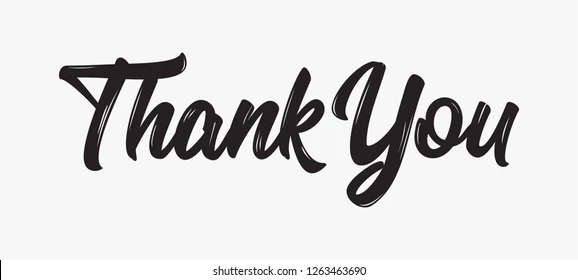